In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [22]:
df = pd.read_csv('/Users/archanaraghu/Desktop/udemy/data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [24]:
#Removing whitespaces

df.columns = ['month', 'diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [25]:
#turning the month column into a DateTime data type and make it an index

df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [26]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


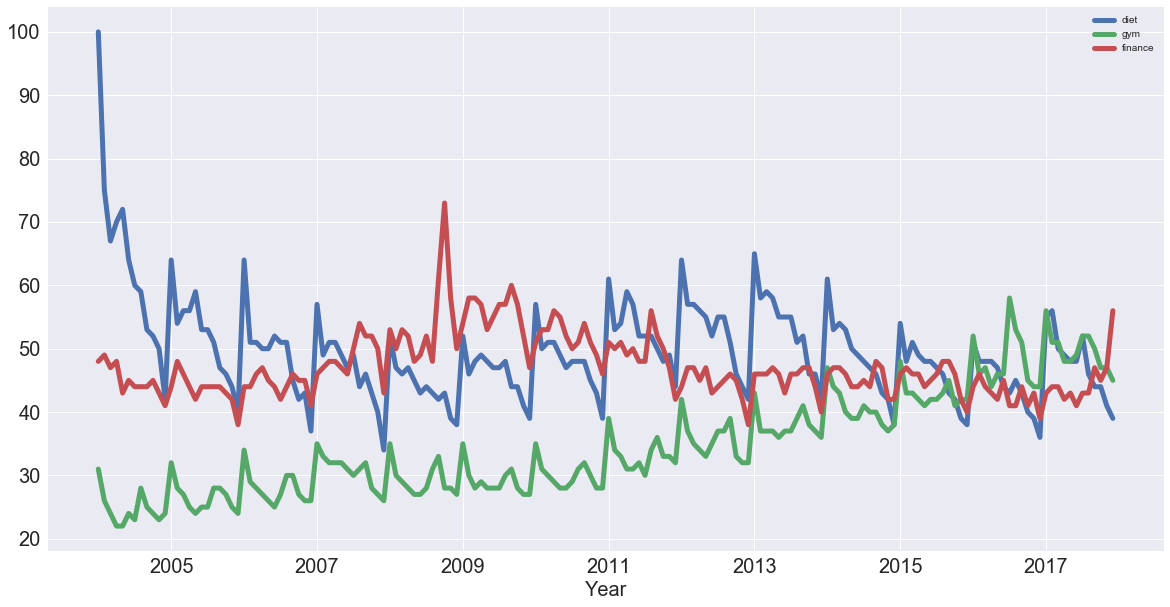

In [27]:
#exploratory data analysis

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

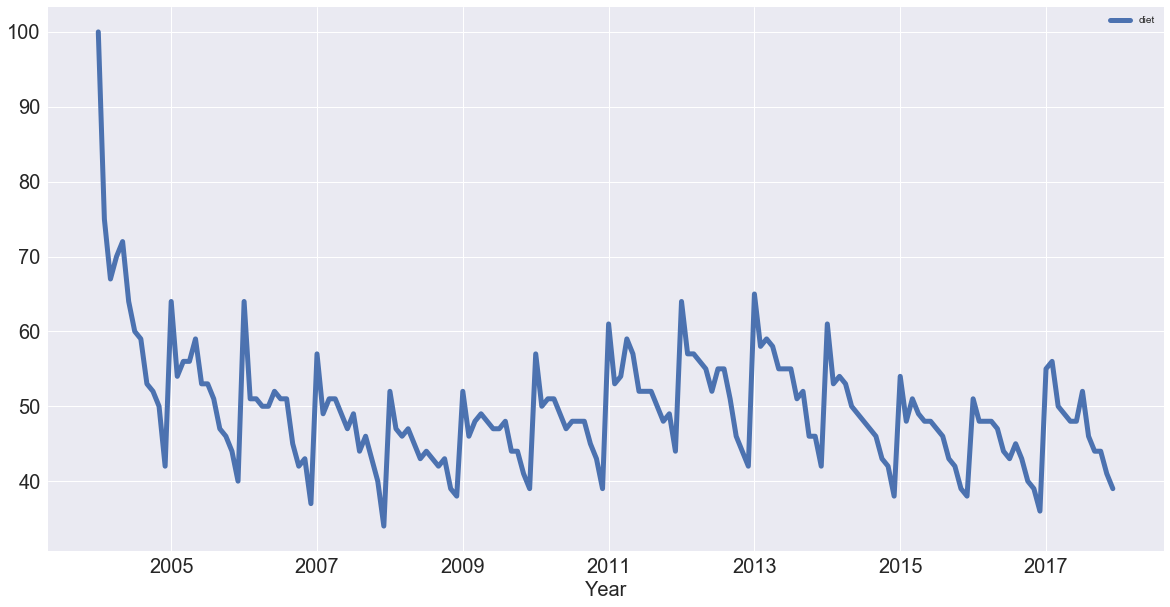

In [28]:
#Plot diet

df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

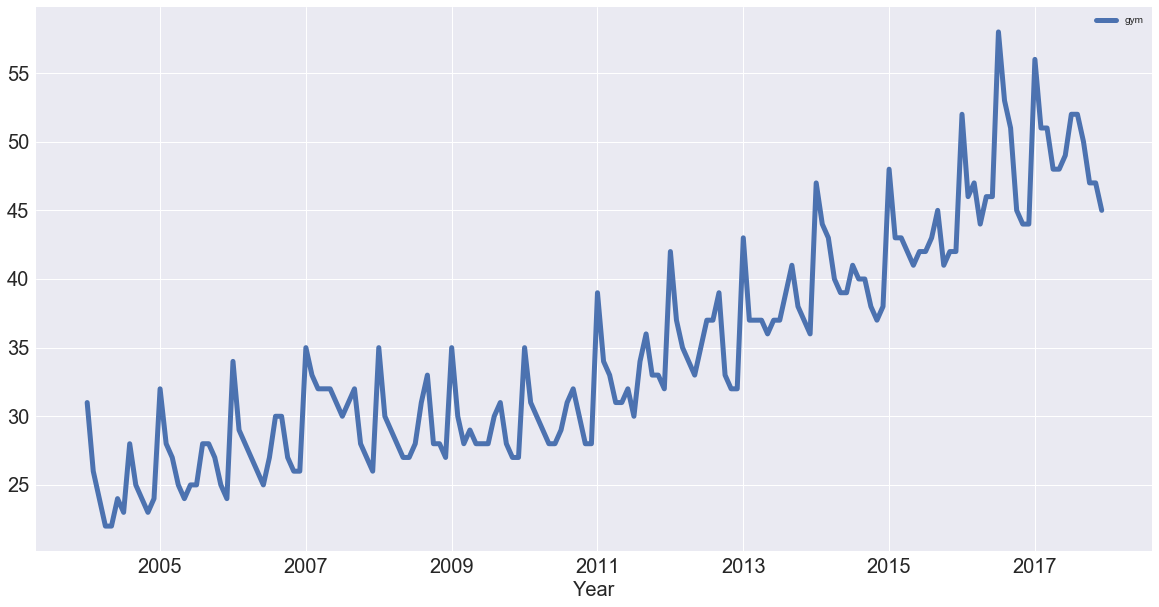

In [29]:
#Plot Gym

df[['gym']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

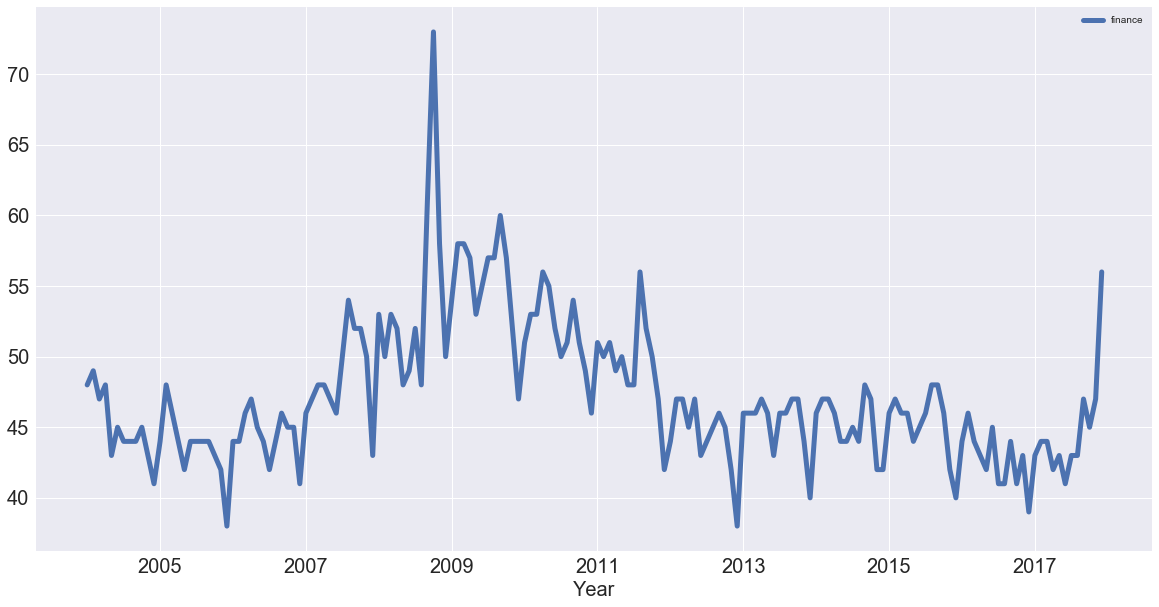

In [30]:
#Plot finance

df[['finance']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

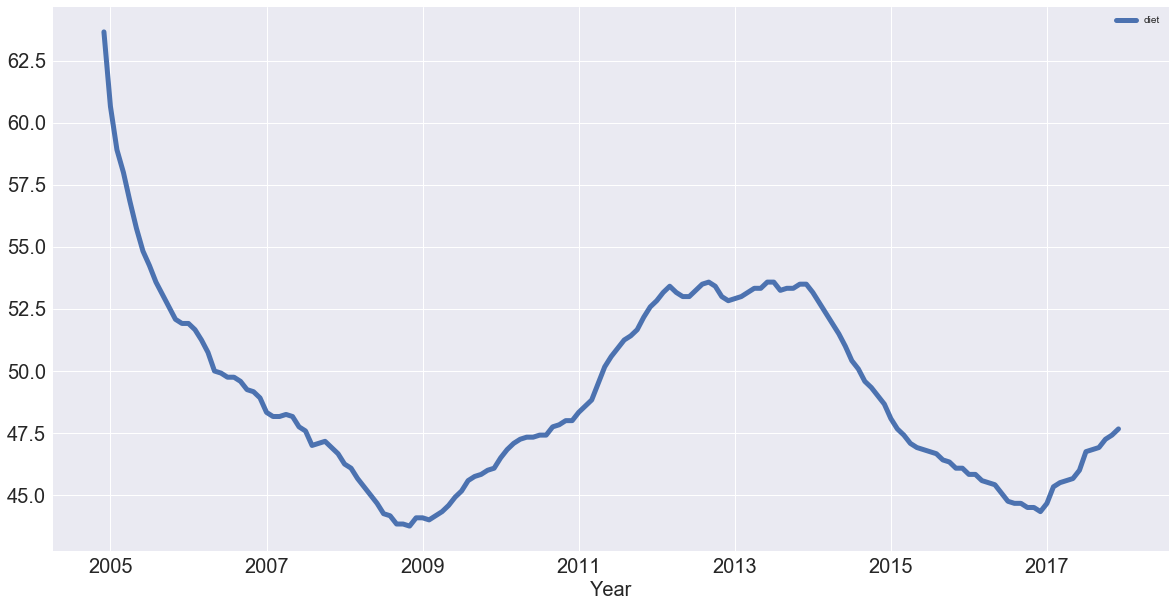

In [51]:
#Trends and Seasonality in Time series
#Popular way is by taking rolling average (for each time point, we take average of the points on either side of it)
#We choose the window size ( here we have chosen the window size as one of the twelve months)


diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

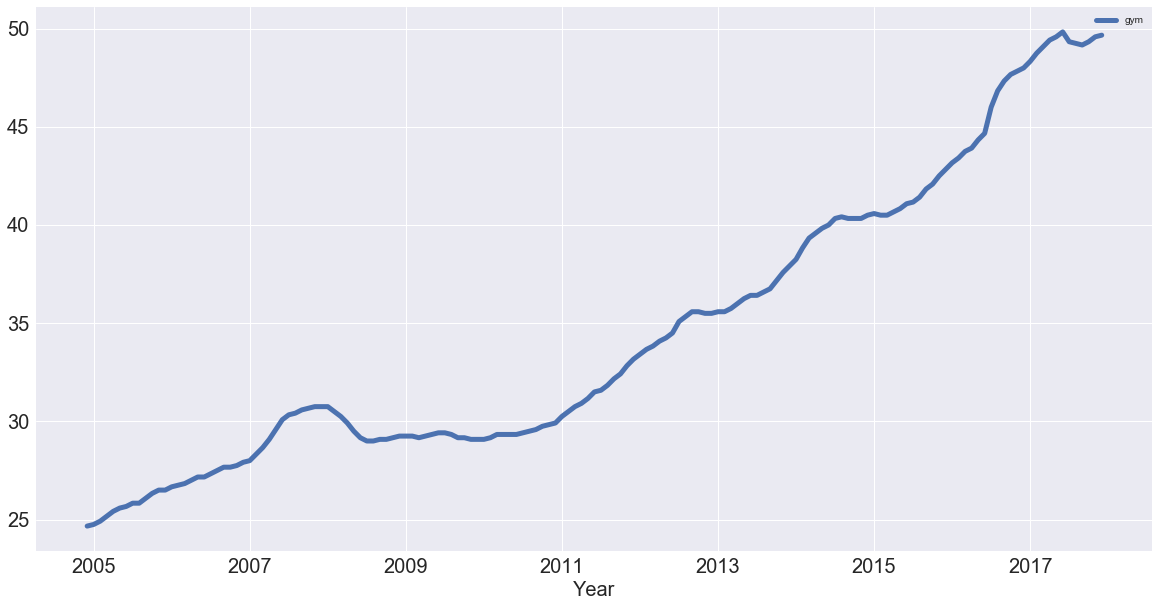

In [52]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

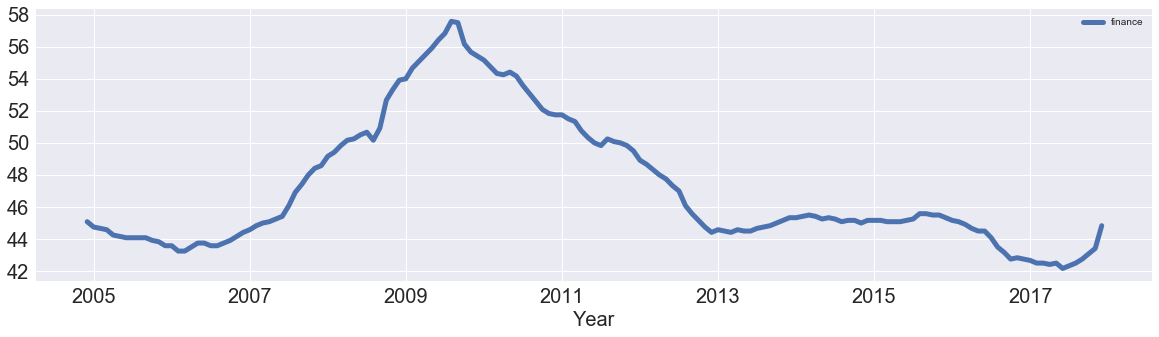

In [53]:
finance = df[['finance']]
finance.rolling(12).mean().plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

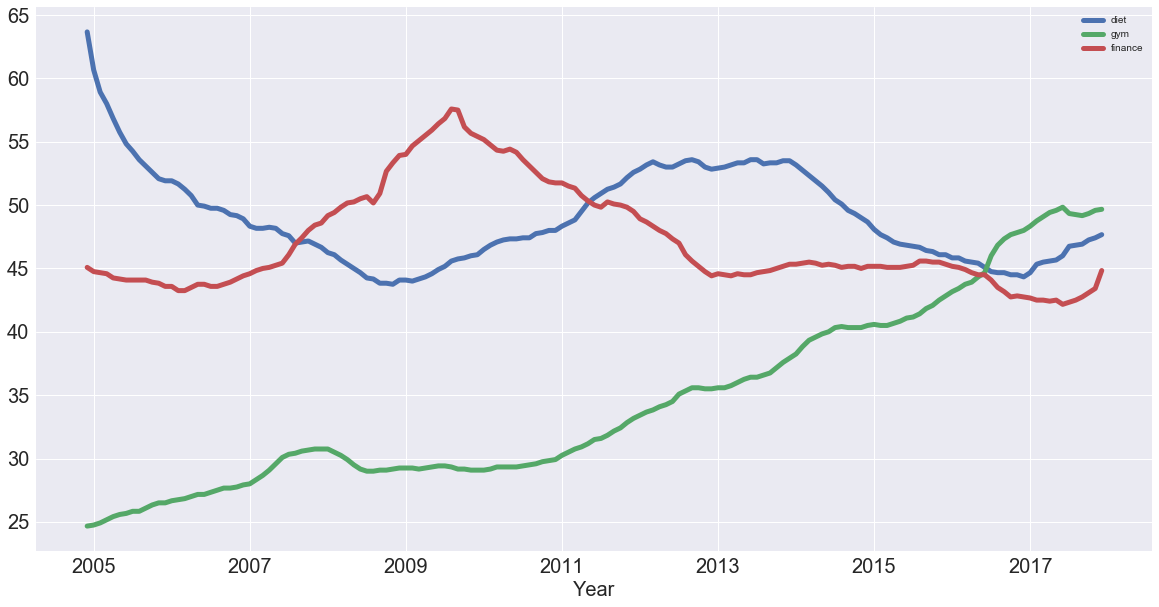

In [47]:
df.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

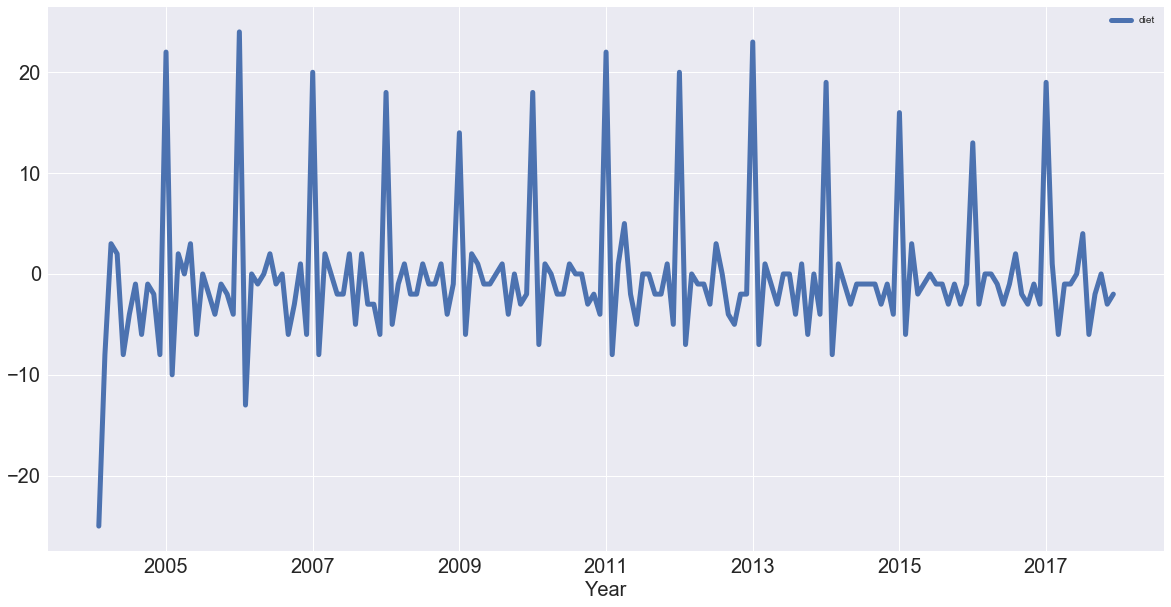

In [54]:
#differencing to remove trends
#First order differencing (difference between one data point and the one before it)

diet.diff().plot(figsize=(20,10), linewidth = 5, fontsize= 20)
plt.xlabel('Year', fontsize=20);

In [55]:
#autocorrelation

df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


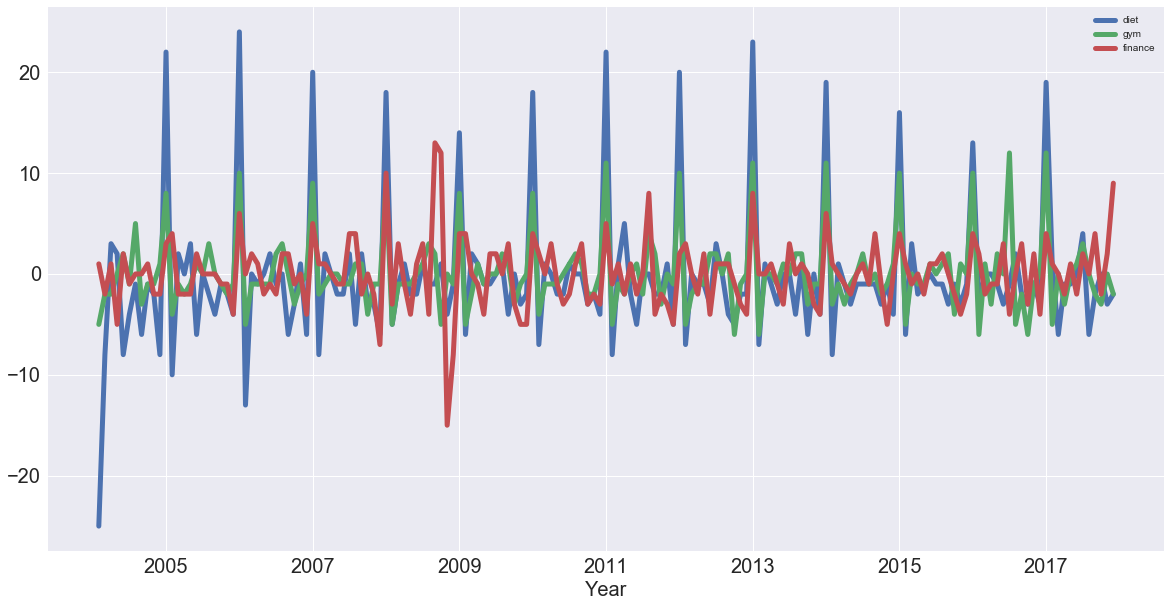

In [56]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize= 20);

In [57]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


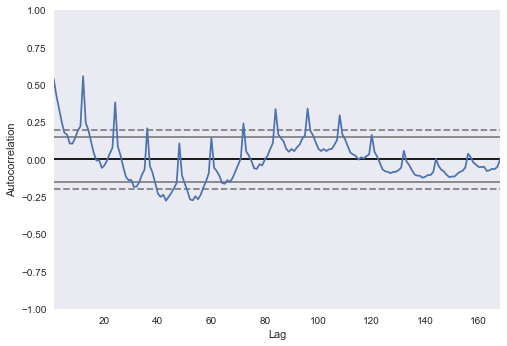

In [58]:
#not that clear
pd.plotting.autocorrelation_plot(diet);